In [1]:
# Import libraries that will be used in this notebook

import pandas as pd
import numpy as np

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_68836/1392230053.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the cleaned data with separator

pcos_data_cleaned = pd.read_csv('data/cleaned_data/pcos_data_cleaned.csv', sep = ';')

In [3]:
# Review dataframe

display(pcos_data_cleaned)

,has_pcos,age,bmi,blood_group,pulse_rate,respiratory_rate,hb,cycle_type,menstrual_phase_days,is_pregnant,...,has_pimples,eats_fast_food,exercises_reg,blood_pressure_systolic,blood_pressure_diastolic,n_of_follicles_left,n_of_follicles_right,avg_follicle_size_left,avg_follicle_size_right,endometrium_size
0,0,28,19.3,15,78,22,10.5,2,5,0,...,0,1,0,110.0,80.0,3,3,18.0,18.0,8.5
1,0,36,24.9,15,74,20,11.7,2,5,1,...,0,0,0,120.0,70.0,3,5,15.0,14.0,3.7
2,1,33,25.3,11,72,18,11.8,2,5,1,...,1,1,0,120.0,80.0,13,15,18.0,20.0,10.0
3,0,37,29.7,13,72,20,12.0,2,5,0,...,0,0,0,120.0,70.0,2,2,15.0,14.0,7.5
4,0,25,20.1,11,72,18,10.0,2,5,1,...,0,0,0,120.0,80.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,18.5,17,72,16,11.0,2,5,0,...,0,0,0,110.0,70.0,1,0,17.5,0.0,6.7
537,0,30,25.3,15,72,18,10.8,2,5,1,...,0,0,0,110.0,70.0,9,7,19.0,18.0,8.2
538,0,36,23.4,13,74,20,10.8,2,6,0,...,0,0,0,110.0,80.0,1,0,18.0,0.0,7.3
539,0,27,22.2,15,74,20,12.0,4,2,0,...,1,0,0,110.0,70.0,7,6,18.0,16.0,11.5


In [4]:
# Before proceeding with our machine learning models, let's do some more EDA by reviewing some charts

pcos_data_cleaned.nunique() # We would like to create some histograms with numeric/continuous variables. Therefore, we will 
# create a function in order to split the dataset into one with continous variables and another with discrete (the dataframe
# splitted will be a copy, the original one will remain untouched under the pcos_data_cleaned variable)

has_pcos                      2
age                          29
bmi                         157
blood_group                   8
pulse_rate                    9
respiratory_rate              8
hb                           43
cycle_type                    2
menstrual_phase_days         12
is_pregnant                   2
n_of_abortions                6
beta_hcg_first              307
beta_hcg_second             202
fsh_lh_ratio                336
waist_hip_ratio              22
tsh                         308
amh                         297
prl                         481
vit_d3                      328
prg                          89
rbs                          55
has_weight_gain               2
has_hair_growth               2
has_skin_darkening            2
has_hair_loss                 2
has_pimples                   2
eats_fast_food                2
exercises_reg                 2
blood_pressure_systolic       5
blood_pressure_diastolic      4
n_of_follicles_left          21
n_of_fol

In [5]:
# Review data types

pcos_data_cleaned.dtypes

has_pcos                      int64
age                           int64
bmi                         float64
blood_group                   int64
pulse_rate                    int64
respiratory_rate              int64
hb                          float64
cycle_type                    int64
menstrual_phase_days          int64
is_pregnant                   int64
n_of_abortions                int64
beta_hcg_first              float64
beta_hcg_second             float64
fsh_lh_ratio                float64
waist_hip_ratio             float64
tsh                         float64
amh                         float64
prl                         float64
vit_d3                      float64
prg                         float64
rbs                         float64
has_weight_gain               int64
has_hair_growth               int64
has_skin_darkening            int64
has_hair_loss                 int64
has_pimples                   int64
eats_fast_food                int64
exercises_reg               

In [6]:
# Create function to split original dataframe into two: one with float64 variables and another with int64

# Special comment: the discrete dataframe will have some categorical variables that were transformed to numerical/binary beforehand.
# We are conscious about this and, in case of any further EDA analysis, we will split the discrete dataframe as well.

def split_dataframes(df: pd.DataFrame):
    '''
    Insert one dataframe will all data and return two: one with float64 variables and another with int64
    '''

    continuous_cols = df.select_dtypes(include=['float64']).columns
    discrete_cols = df.select_dtypes(include=['int64']).columns
    
    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]
    
    return continuous_df, discrete_df

In [7]:
# Execute function

continuous_df, discrete_df = split_dataframes(pcos_data_cleaned)

In [8]:
# Import libraries to create some charts

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Let's review the continuous variables with some charts

def create_histograms(df: pd.DataFrame):
    '''
    This function histograms for all the columns in a dataframe that only has continuous variables
    '''

    num_cols = df.shape[1]
    num_rows = num_cols // 3 + 1
    
    fig, axes = plt.subplots(3, num_rows, figsize=(12, 12))

    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        sns.histplot(df, x = column, bins=50, ax=axes[i])

    plt.tight_layout()
    plt.show()

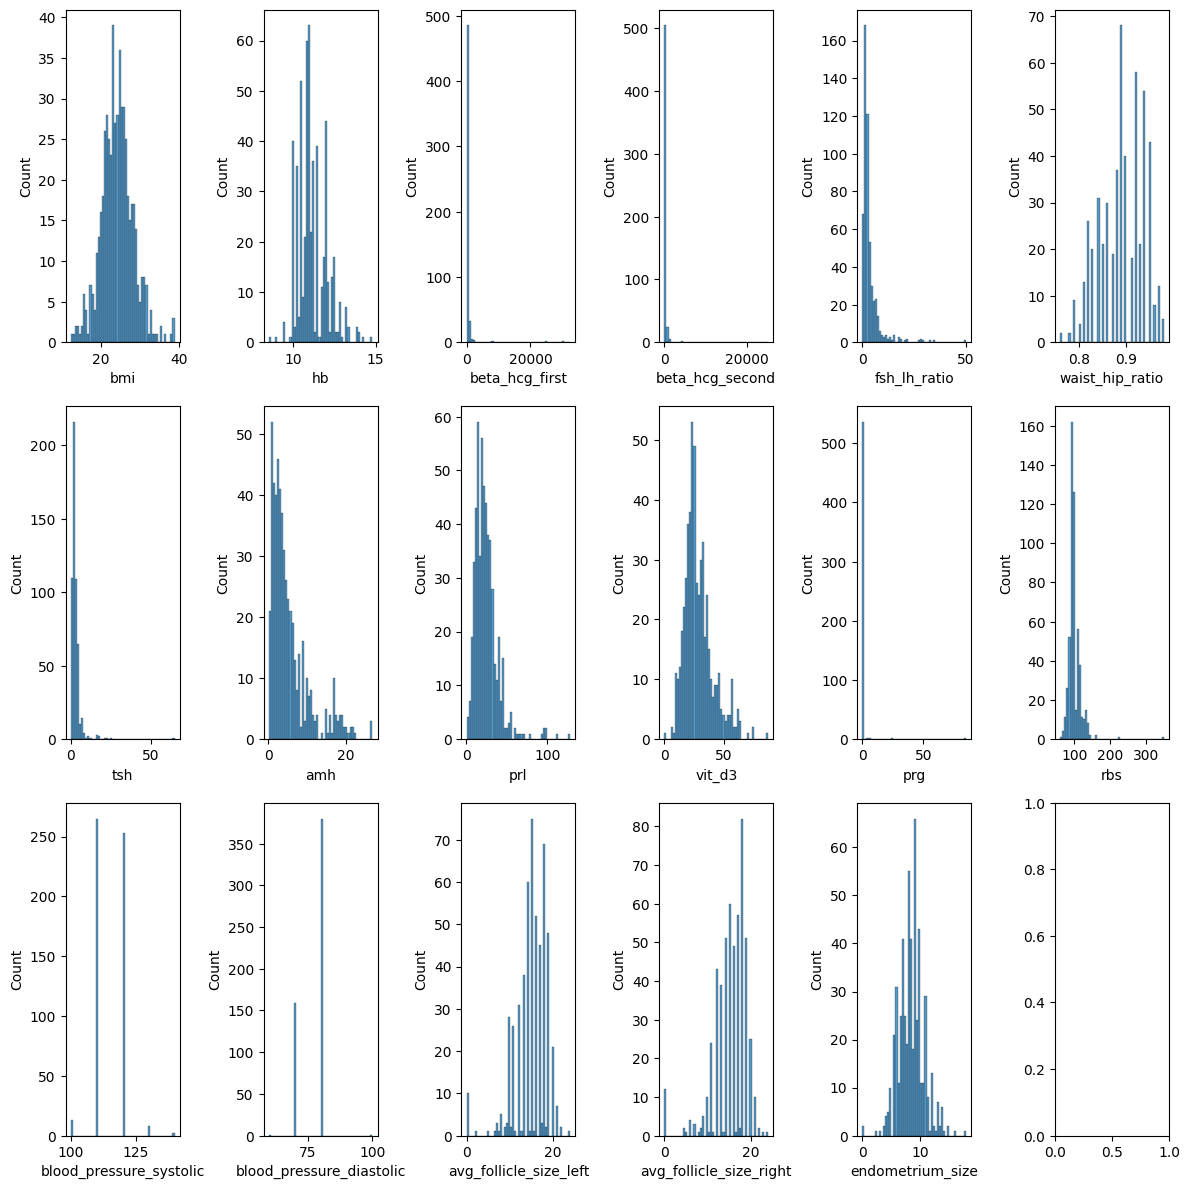

In [10]:
create_histograms(continuous_df)

In [11]:
# Highest skewness

# By looking at the previous histograms, we can presume that some variables are gonna be heavily skewed (also, we can see this
# by calculating the skewness). During the data cleaning process, we corrected some of the outliers in order to avoid this
# as much as we could. As we will use machine learning models such as Logistic Regression, Random Forest and Gradient Boosting
# we won't need to worry a lot about the skewness because these models don't assume linear relationships and they are also
# robust to outliers in the predictor variables.

# These histograms were also very helpful in order to understand if we still had some outliers that definitely had to
# be addressed.

In [12]:
# Let's review the discrete variables and create a dataframe only with those that are not binary
# We will also drop the variable blood_group as it's essentially categorical

columns_to_move = ['has_pcos','blood_group', 'cycle_type', 'is_pregnant', 'has_weight_gain', 'has_hair_growth', 'has_skin_darkening', 'has_hair_loss', 'has_pimples', 'eats_fast_food', 'exercises_reg']
categorical_df = discrete_df[columns_to_move]
discrete_df_reduced = discrete_df.drop(columns_to_move, axis=1)

In [13]:
# Review the remaining dataframes

display(categorical_df) # Categorical variables
display(discrete_df_reduced) # Numerical/discrete variables

,has_pcos,blood_group,cycle_type,is_pregnant,has_weight_gain,has_hair_growth,has_skin_darkening,has_hair_loss,has_pimples,eats_fast_food,exercises_reg
0,0,15,2,0,0,0,0,0,0,1,0
1,0,15,2,1,0,0,0,0,0,0,0
2,1,11,2,1,0,0,0,1,1,1,0
3,0,13,2,0,0,0,0,0,0,0,0
4,0,11,2,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,17,2,0,0,0,0,0,0,0,0
537,0,15,2,1,1,0,0,0,0,0,0
538,0,13,2,0,0,0,0,0,0,0,0
539,0,15,4,0,0,0,0,0,1,0,0


,age,pulse_rate,respiratory_rate,menstrual_phase_days,n_of_abortions,n_of_follicles_left,n_of_follicles_right
0,28,78,22,5,0,3,3
1,36,74,20,5,0,3,5
2,33,72,18,5,0,13,15
3,37,72,20,5,0,2,2
4,25,72,18,5,0,3,4
...,...,...,...,...,...,...,...
536,35,72,16,5,1,1,0
537,30,72,18,5,1,9,7
538,36,74,20,6,0,1,0
539,27,74,20,2,0,7,6


In [14]:
# Create a function

def create_barplots(df: pd.DataFrame):
    '''
    This function creates barplots for all the columns in a dataframe that only has discrete variables
    '''

    num_cols = df.shape[1]
    num_rows = num_cols // 2 + 1
    
    fig, axes = plt.subplots(2, num_rows, figsize=(10, 10))

    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        sns.histplot(x=column, data=df, ax=axes[i])
        #ax[i].set_ylim(0, 8000)

    plt.tight_layout()
    plt.show()

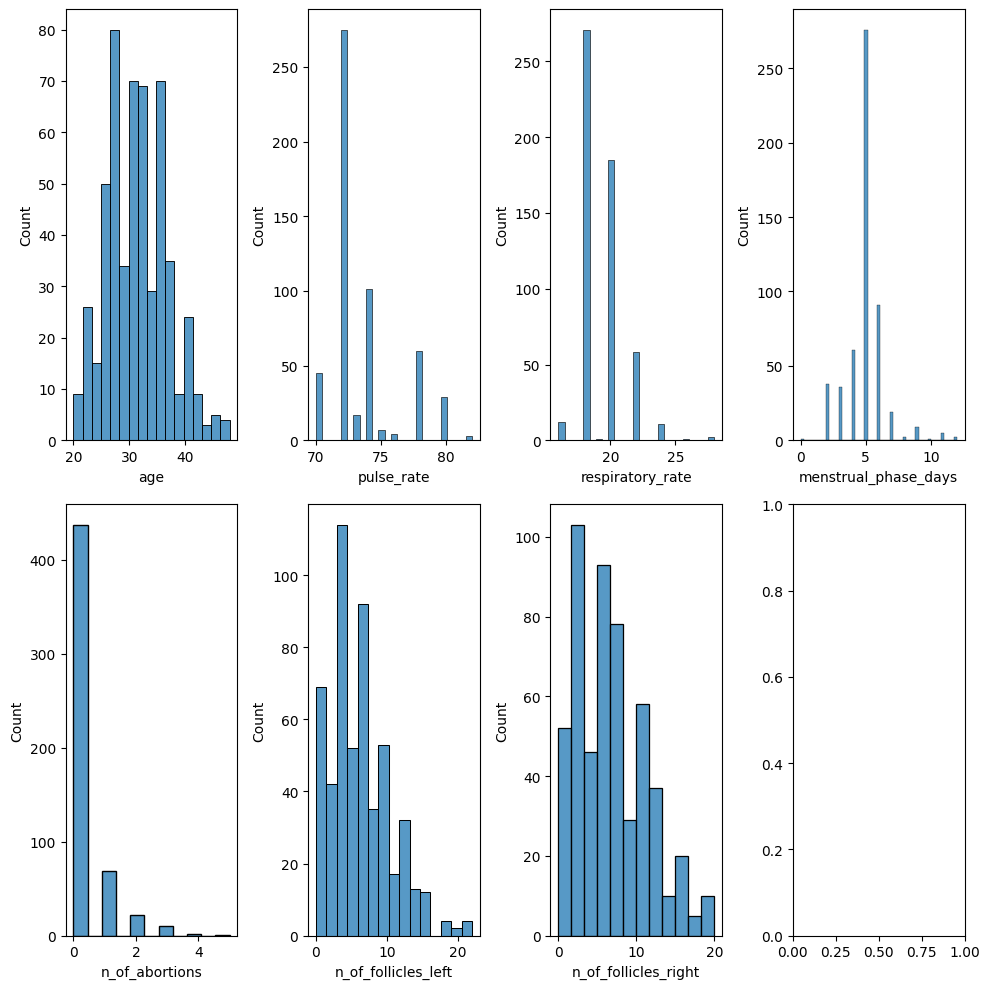

In [15]:
create_barplots(discrete_df_reduced)

# The same skewness comment as before is applied here

# These barplots were also very helpful in order to understand if we still had some outliers that definitely had to
# be addressed and if we were considering the correct discrete variables in our analysis.

In [15]:
# At the moment we have 3 different dataframes

# continuous_df: with numerical/continuous variables
# discrete_df_reduced: with numerical/discrete variables
# categorical_df: with categorical variables

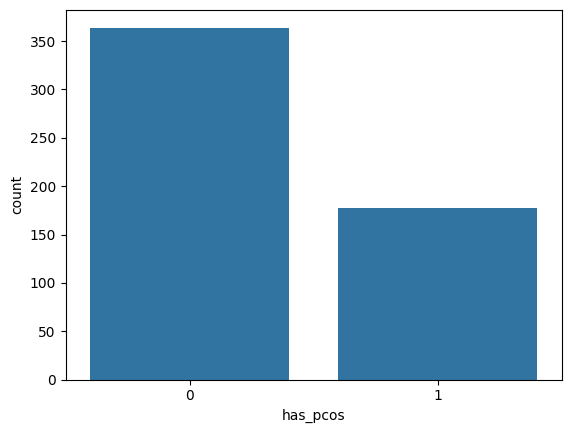

has_pcos
0    364
1    177
Name: count, dtype: int64

In [16]:
# As we will work with machine learning models in order to predict if a woman will have PCOS or not, it's important to check
# if there's any type of class imbalance before continuing with the process. This is part of the EDA analysis.
# "No" = 0, "Yes" = 1

sns.countplot(x='has_pcos', data = categorical_df)
plt.show()

pcos_data_cleaned['has_pcos'].value_counts()

# As we can see here, there's not a lot of class imbalance but we will perform some upsampling and SMOTE techniques later in order to understand if that
# will increase the performance of our model.

In [17]:
# Now that we did an EDA analysis, let's concatenate the numerical dataframes in order to create a correlation matrix. With this,
# we would like to understand if we have variables that are highly correlated between them (this could have some impact
# in our models and create biases).

numerical_df = pd.concat([continuous_df, discrete_df_reduced], axis=1)
display(numerical_df)

,bmi,hb,beta_hcg_first,beta_hcg_second,fsh_lh_ratio,waist_hip_ratio,tsh,amh,prl,vit_d3,...,avg_follicle_size_left,avg_follicle_size_right,endometrium_size,age,pulse_rate,respiratory_rate,menstrual_phase_days,n_of_abortions,n_of_follicles_left,n_of_follicles_right
0,19.3,10.5,1.99,1.99,2.16,0.83,0.68,2.07,45.16,17.1,...,18.0,18.0,8.5,28,78,22,5,0,3,3
1,24.9,11.7,60.80,1.99,6.17,0.84,3.16,1.53,20.09,61.3,...,15.0,14.0,3.7,36,74,20,5,0,3,5
2,25.3,11.8,494.08,494.08,6.30,0.90,2.54,6.63,10.52,49.7,...,18.0,20.0,10.0,33,72,18,5,0,13,15
3,29.7,12.0,1.99,1.99,3.42,0.86,16.41,1.22,36.90,33.4,...,15.0,14.0,7.5,37,72,20,5,0,2,2
4,20.1,10.0,801.45,801.45,4.42,0.81,3.57,2.26,30.09,43.8,...,16.0,14.0,7.0,25,72,18,5,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,18.5,11.0,1.99,1.99,5.56,0.93,1.11,1.70,5.30,36.6,...,17.5,0.0,6.7,35,72,16,5,1,1,0
537,25.3,10.8,80.13,1.99,1.79,0.94,2.05,5.60,21.09,23.0,...,19.0,18.0,8.2,30,72,18,5,1,9,7
538,23.4,10.8,1.99,1.99,4.30,0.93,2.87,3.70,96.41,22.5,...,18.0,0.0,7.3,36,74,20,6,0,1,0
539,22.2,12.0,292.92,1.99,1.02,0.93,2.50,5.20,38.89,22.4,...,18.0,16.0,11.5,27,74,20,2,0,7,6


In [18]:
# Let's create our correlation matrix.
# In this matrix we will only have variables that are truly numerical. We are not considering any variables from the categorical_df
# (even if their values are numbers) because they are either binary or nominal (for instance, the different blood groups).

correlations_matrix = numerical_df.corr().round(3)
correlations_matrix

,bmi,hb,beta_hcg_first,beta_hcg_second,fsh_lh_ratio,waist_hip_ratio,tsh,amh,prl,vit_d3,...,avg_follicle_size_left,avg_follicle_size_right,endometrium_size,age,pulse_rate,respiratory_rate,menstrual_phase_days,n_of_abortions,n_of_follicles_left,n_of_follicles_right
bmi,1.000,0.004,-0.010,-0.016,-0.053,0.023,0.071,0.050,-0.047,-0.051,...,-0.022,-0.077,0.009,0.021,0.024,0.062,-0.007,0.110,0.143,0.104
hb,0.004,1.000,-0.017,-0.095,-0.054,0.057,-0.022,0.033,-0.065,0.044,...,0.013,0.036,-0.066,-0.022,-0.057,-0.040,-0.052,0.060,0.061,0.073
beta_hcg_first,-0.010,-0.017,1.000,0.534,0.091,-0.023,-0.045,0.024,-0.013,-0.016,...,0.051,0.073,-0.051,0.008,-0.049,-0.085,0.020,0.058,0.048,0.018
beta_hcg_second,-0.016,-0.095,0.534,1.000,0.148,0.002,-0.037,0.009,-0.001,0.040,...,0.003,0.041,0.017,0.043,-0.038,-0.039,0.019,0.047,0.064,0.038
fsh_lh_ratio,-0.053,-0.054,0.091,0.148,1.000,0.012,-0.043,-0.129,0.008,0.111,...,0.059,0.040,-0.023,0.088,-0.011,-0.049,0.047,-0.053,-0.035,-0.013
waist_hip_ratio,0.023,0.057,-0.023,0.002,0.012,1.000,-0.075,0.052,0.090,-0.131,...,0.226,0.119,-0.028,0.067,-0.067,-0.074,-0.127,-0.008,0.025,-0.003
tsh,0.071,-0.022,-0.045,-0.037,-0.043,-0.075,1.000,-0.001,0.016,-0.057,...,-0.103,-0.065,0.005,0.017,-0.087,-0.009,-0.003,0.029,-0.031,-0.019
amh,0.050,0.033,0.024,0.009,-0.129,0.052,-0.001,1.000,-0.055,-0.086,...,0.141,0.120,0.114,-0.187,-0.030,-0.027,-0.083,-0.044,0.217,0.193
prl,-0.047,-0.065,-0.013,-0.001,0.008,0.090,0.016,-0.055,1.000,-0.044,...,0.086,0.052,0.031,-0.049,-0.006,0.006,0.016,-0.063,-0.009,-0.008
vit_d3,-0.051,0.044,-0.016,0.040,0.111,-0.131,-0.057,-0.086,-0.044,1.000,...,-0.075,-0.082,0.027,0.001,0.056,0.054,0.036,-0.018,0.054,0.067


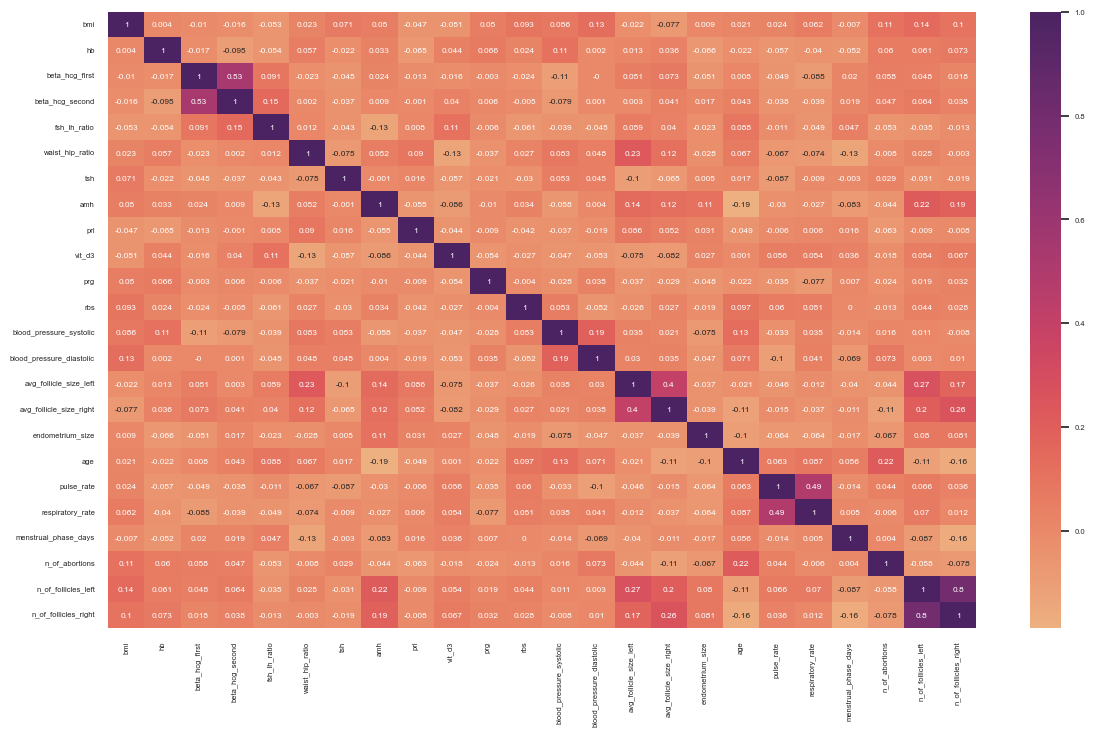

In [19]:
# Let's look at correlations with a heatmap

cmap = sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(14, 8))
sns.set(font_scale=0.5)
sns.heatmap((correlations_matrix), annot=True, cmap=cmap) 
plt.show()

# The maximum correlation that we have between numeric variables is 0.53 and this is not big. Therefore, we don't have numerical variables that suffer
# from multicollinearity.

In [20]:
# Now that we did an EDA and checked that we don't have multicollinearity, let's start working in our models.
# The previous dataframes were created only with EDA purposes and they won't be used in our notebook anymore. 
# We will work with a copy of our pcos_data_cleaned dataframe as its values were not modified or transformed.

model_pcos_data = pcos_data_cleaned.copy()
model_pcos_data

,has_pcos,age,bmi,blood_group,pulse_rate,respiratory_rate,hb,cycle_type,menstrual_phase_days,is_pregnant,...,has_pimples,eats_fast_food,exercises_reg,blood_pressure_systolic,blood_pressure_diastolic,n_of_follicles_left,n_of_follicles_right,avg_follicle_size_left,avg_follicle_size_right,endometrium_size
0,0,28,19.3,15,78,22,10.5,2,5,0,...,0,1,0,110.0,80.0,3,3,18.0,18.0,8.5
1,0,36,24.9,15,74,20,11.7,2,5,1,...,0,0,0,120.0,70.0,3,5,15.0,14.0,3.7
2,1,33,25.3,11,72,18,11.8,2,5,1,...,1,1,0,120.0,80.0,13,15,18.0,20.0,10.0
3,0,37,29.7,13,72,20,12.0,2,5,0,...,0,0,0,120.0,70.0,2,2,15.0,14.0,7.5
4,0,25,20.1,11,72,18,10.0,2,5,1,...,0,0,0,120.0,80.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,18.5,17,72,16,11.0,2,5,0,...,0,0,0,110.0,70.0,1,0,17.5,0.0,6.7
537,0,30,25.3,15,72,18,10.8,2,5,1,...,0,0,0,110.0,70.0,9,7,19.0,18.0,8.2
538,0,36,23.4,13,74,20,10.8,2,6,0,...,0,0,0,110.0,80.0,1,0,18.0,0.0,7.3
539,0,27,22.2,15,74,20,12.0,4,2,0,...,1,0,0,110.0,70.0,7,6,18.0,16.0,11.5


In [21]:
# Let's perform a X/y split in order to split the column that we would like to predict (y) from the rest.

y = model_pcos_data['has_pcos']
X = model_pcos_data.drop(['has_pcos'], axis = 1)

In [22]:
# We will create train and test sets for both X and y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69) # We will split 20% of our dataframes for test

# This retrieves a numpy array. Therefore, we need to create dataframes for our X_train and X_test sets

In [23]:
# Create dataframes and review them 

X_train_df = pd.DataFrame(X_train, columns = X.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test, columns = X.columns).reset_index(drop=True)

display(X_train_df) # We can see that the train set has 80% of the rows of the model_pcos_data
display(X_test_df) # The test set has 20% of the rows of the model_pcos_data

,age,bmi,blood_group,pulse_rate,respiratory_rate,hb,cycle_type,menstrual_phase_days,is_pregnant,n_of_abortions,...,has_pimples,eats_fast_food,exercises_reg,blood_pressure_systolic,blood_pressure_diastolic,n_of_follicles_left,n_of_follicles_right,avg_follicle_size_left,avg_follicle_size_right,endometrium_size
0,29,20.4,15,72,18,10.2,2,6,1,0,...,1,1,0,110.0,80.0,6,4,16.0,17.0,6.0
1,27,23.6,15,72,18,10.0,2,6,1,0,...,1,0,0,110.0,70.0,3,3,14.0,12.0,10.5
2,32,29.3,15,78,22,11.2,2,5,0,1,...,1,1,1,120.0,80.0,9,12,14.0,13.0,7.8
3,41,28.2,15,72,18,11.0,4,3,0,0,...,0,1,0,130.0,80.0,4,2,14.0,11.0,7.0
4,33,25.3,15,72,18,12.8,2,3,0,1,...,1,1,1,120.0,80.0,5,5,18.0,20.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,45,21.1,17,72,18,10.2,4,4,0,2,...,1,1,0,120.0,80.0,4,8,15.0,18.0,7.2
428,26,17.3,15,72,18,10.5,2,6,1,0,...,0,0,0,120.0,70.0,4,5,18.0,20.0,9.5
429,34,28.2,13,72,20,11.2,2,5,1,0,...,1,1,0,110.0,80.0,7,13,15.0,19.0,10.3
430,23,23.3,14,73,18,13.2,4,4,0,0,...,0,1,0,110.0,80.0,14,16,17.0,15.0,10.6


,age,bmi,blood_group,pulse_rate,respiratory_rate,hb,cycle_type,menstrual_phase_days,is_pregnant,n_of_abortions,...,has_pimples,eats_fast_food,exercises_reg,blood_pressure_systolic,blood_pressure_diastolic,n_of_follicles_left,n_of_follicles_right,avg_follicle_size_left,avg_follicle_size_right,endometrium_size
0,40,25.6,12,72,18,10.5,2,5,1,1,...,0,1,1,110.0,80.0,9,10,22.0,17.0,8.15
1,42,26.0,11,72,18,10.5,2,6,1,0,...,1,1,0,110.0,70.0,5,7,14.0,15.0,7.00
2,25,21.1,11,72,18,10.5,2,5,0,0,...,1,1,0,110.0,70.0,3,7,15.0,14.0,11.50
3,34,25.3,11,72,22,12.0,2,4,0,0,...,1,1,0,110.0,80.0,5,10,14.0,13.0,6.00
4,36,27.0,13,72,18,10.8,2,5,0,0,...,0,0,0,110.0,80.0,1,2,20.0,18.0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,37,24.2,13,74,20,11.7,2,5,0,0,...,1,0,1,120.0,70.0,4,5,17.0,16.0,5.60
105,27,23.1,11,82,20,11.1,2,5,0,0,...,0,1,1,120.0,80.0,1,1,16.0,17.0,8.55
106,39,38.5,15,72,18,12.0,2,6,0,1,...,1,1,0,120.0,80.0,9,7,16.0,13.0,9.60
107,28,21.0,11,74,18,10.8,2,6,1,0,...,1,1,0,100.0,70.0,4,6,14.0,18.0,7.70


In [24]:
# All variables (numerical and categorical) are already represented by a number. Therefore, we won't split the dataframe and will apply directly a 
# specific transformer in all of them.
# In this case, we will use a MinMaxScaler.

import pickle
import os
from sklearn.preprocessing import MinMaxScaler

In [25]:
standard_scaler = MinMaxScaler()

standard_scaler.fit(X_train_df) # Fit the train set

MinMaxScaler()

In [26]:
# Store transformer

path = "transformers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

scaler_file_name = "standard_scaler.pkl"
with open(path + scaler_file_name, "wb") as file:
    pickle.dump(standard_scaler, file)

In [27]:
# We apply transformation in both sets for ranges to be similar    

X_train_scaled = standard_scaler.transform(X_train_df) # Apply transformation on train set
X_test_scaled = standard_scaler.transform(X_test_df) # Apply transformation on test set

In [28]:
# Let's create dataframes as the previous transformation retrieves a numpy array.

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_test_df.columns)

# Display dataframes

display(X_train_scaled_df)
display(X_test_scaled_df)

,age,bmi,blood_group,pulse_rate,respiratory_rate,hb,cycle_type,menstrual_phase_days,is_pregnant,n_of_abortions,...,has_pimples,eats_fast_food,exercises_reg,blood_pressure_systolic,blood_pressure_diastolic,n_of_follicles_left,n_of_follicles_right,avg_follicle_size_left,avg_follicle_size_right,endometrium_size
0,0.321429,0.301887,0.571429,0.166667,0.166667,0.269841,0.0,0.500000,1.0,0.0,...,1.0,1.0,0.0,0.25,0.333333,0.272727,0.20,0.666667,0.708333,0.37500
1,0.250000,0.422642,0.571429,0.166667,0.166667,0.238095,0.0,0.500000,1.0,0.0,...,1.0,0.0,0.0,0.25,0.000000,0.136364,0.15,0.583333,0.500000,0.65625
2,0.428571,0.637736,0.571429,0.666667,0.500000,0.428571,0.0,0.416667,0.0,0.2,...,1.0,1.0,1.0,0.50,0.333333,0.409091,0.60,0.583333,0.541667,0.48750
3,0.750000,0.596226,0.571429,0.166667,0.166667,0.396825,1.0,0.250000,0.0,0.0,...,0.0,1.0,0.0,0.75,0.333333,0.181818,0.10,0.583333,0.458333,0.43750
4,0.464286,0.486792,0.571429,0.166667,0.166667,0.682540,0.0,0.250000,0.0,0.2,...,1.0,1.0,1.0,0.50,0.333333,0.227273,0.25,0.750000,0.833333,0.43750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.892857,0.328302,0.857143,0.166667,0.166667,0.269841,1.0,0.333333,0.0,0.4,...,1.0,1.0,0.0,0.50,0.333333,0.181818,0.40,0.625000,0.750000,0.45000
428,0.214286,0.184906,0.571429,0.166667,0.166667,0.317460,0.0,0.500000,1.0,0.0,...,0.0,0.0,0.0,0.50,0.000000,0.181818,0.25,0.750000,0.833333,0.59375
429,0.500000,0.596226,0.285714,0.166667,0.333333,0.428571,0.0,0.416667,1.0,0.0,...,1.0,1.0,0.0,0.25,0.333333,0.318182,0.65,0.625000,0.791667,0.64375
430,0.107143,0.411321,0.428571,0.250000,0.166667,0.746032,1.0,0.333333,0.0,0.0,...,0.0,1.0,0.0,0.25,0.333333,0.636364,0.80,0.708333,0.625000,0.66250


,age,bmi,blood_group,pulse_rate,respiratory_rate,hb,cycle_type,menstrual_phase_days,is_pregnant,n_of_abortions,...,has_pimples,eats_fast_food,exercises_reg,blood_pressure_systolic,blood_pressure_diastolic,n_of_follicles_left,n_of_follicles_right,avg_follicle_size_left,avg_follicle_size_right,endometrium_size
0,0.714286,0.498113,0.142857,0.166667,0.166667,0.317460,0.0,0.416667,1.0,0.2,...,0.0,1.0,1.0,0.25,0.333333,0.409091,0.50,0.916667,0.708333,0.509375
1,0.785714,0.513208,0.000000,0.166667,0.166667,0.317460,0.0,0.500000,1.0,0.0,...,1.0,1.0,0.0,0.25,0.000000,0.227273,0.35,0.583333,0.625000,0.437500
2,0.178571,0.328302,0.000000,0.166667,0.166667,0.317460,0.0,0.416667,0.0,0.0,...,1.0,1.0,0.0,0.25,0.000000,0.136364,0.35,0.625000,0.583333,0.718750
3,0.500000,0.486792,0.000000,0.166667,0.500000,0.555556,0.0,0.333333,0.0,0.0,...,1.0,1.0,0.0,0.25,0.333333,0.227273,0.50,0.583333,0.541667,0.375000
4,0.571429,0.550943,0.285714,0.166667,0.166667,0.365079,0.0,0.416667,0.0,0.0,...,0.0,0.0,0.0,0.25,0.333333,0.045455,0.10,0.833333,0.750000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.607143,0.445283,0.285714,0.333333,0.333333,0.507937,0.0,0.416667,0.0,0.0,...,1.0,0.0,1.0,0.50,0.000000,0.181818,0.25,0.708333,0.666667,0.350000
105,0.250000,0.403774,0.000000,1.000000,0.333333,0.412698,0.0,0.416667,0.0,0.0,...,0.0,1.0,1.0,0.50,0.333333,0.045455,0.05,0.666667,0.708333,0.534375
106,0.678571,0.984906,0.571429,0.166667,0.166667,0.555556,0.0,0.500000,0.0,0.2,...,1.0,1.0,0.0,0.50,0.333333,0.409091,0.35,0.666667,0.541667,0.600000
107,0.285714,0.324528,0.000000,0.333333,0.166667,0.365079,0.0,0.500000,1.0,0.0,...,1.0,1.0,0.0,0.00,0.000000,0.181818,0.30,0.583333,0.750000,0.481250


# Logistic Regression model

In [29]:
# Let's build a Logistic Regression model - We won't balance the data yet

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state = 69, solver = 'lbfgs', multi_class = 'multinomial')

classification.fit(X_train_scaled_df, y_train)


LogisticRegression(multi_class='multinomial', random_state=69)

In [30]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "classification.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(classification, file)

In [31]:
# Making predictions

y_test_pred = classification.predict(X_test_scaled_df)

In [32]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred) # The confusion matrix is created with the real values and the predicted ones

array([[71,  5],
       [ 5, 28]])

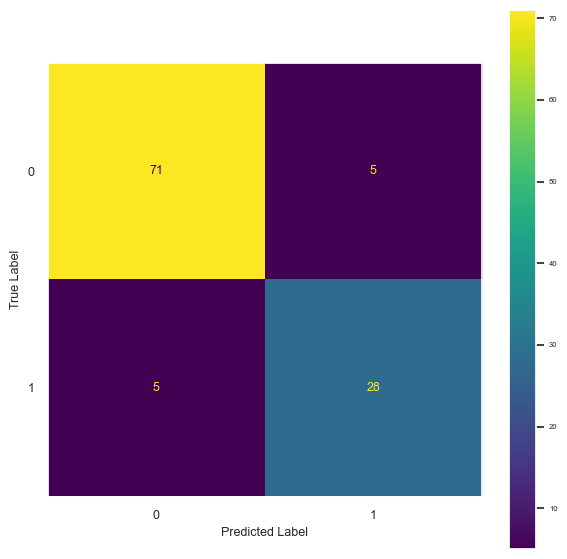

In [33]:
# Plot the confusion matrix

cfm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cfm, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

In [34]:
# Let's print a classification report in order to take a closer look at how our model is performing

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

# Accuracy of our model is 91% (this value is very good!)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        76
           1       0.85      0.85      0.85        33

    accuracy                           0.91       109
   macro avg       0.89      0.89      0.89       109
weighted avg       0.91      0.91      0.91       109



In [45]:
# Let's calculate the Kappa score (we could have a very good accuracy but, if the kappa score is not good, we cannot say that the performance of our model is
# good)

from sklearn.metrics import cohen_kappa_score

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred).round(2))

# We got an excellent kappa score for our model! But let's remember that we haven't balanced our data yet. Let's try to balance it and check if the accuracy of our
# model and the kappa score get better. As our dataset is not that big, we will perform only upsampling and SMOTE on it.

Kappa score: 0.78


# Logistic Regression - Upsampling

In [36]:
# Let's import the library first

from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

In [37]:
print(X_train.shape)
print(y_train[y_train== 0].shape)

(432, 34)
(288,)


In [38]:
# separate majority/minority classes
ros = RandomOverSampler(random_state=69)

X_train_up, y_train_up = ros.fit_resample(X_train_scaled_df, y_train)
print('Resampled dataset shape %s' % Counter(y_train_up))
print(y_train_up.value_counts())

# As we can see here, the minority class was upsampled from 177 to 288

Resampled dataset shape Counter({0: 288, 1: 288})
has_pcos
0    288
1    288
Name: count, dtype: int64


In [39]:
# Let's apply our Logistic Regression model in our upsampled dataset

classification_2 = LogisticRegression()
classification_2.fit(X_train_up, y_train_up)
y_test_pred_up = classification_2.predict(X_test_scaled_df)

In [40]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "classification_2.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(classification_2, file)

In [41]:
# Create a confusion matrix for our upsampled dataset

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cfm_2 = confusion_matrix(y_test, y_test_pred_up)
cfm_2

array([[67,  9],
       [ 4, 29]])

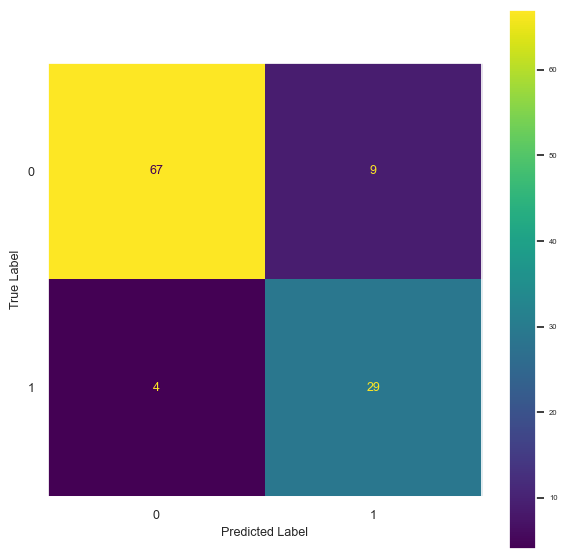

In [42]:
# Plot the confusion matrix (Upsampling)

disp = ConfusionMatrixDisplay(cfm_2, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

In [43]:
# Let's print a classification report in order to take a closer look at how the model is performing after the upsampling

print(classification_report(y_test, y_test_pred_up))

# Accuracy of our model is 88% (even if the value is very good, it decreased a little from the original one).

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        76
           1       0.76      0.88      0.82        33

    accuracy                           0.88       109
   macro avg       0.85      0.88      0.86       109
weighted avg       0.89      0.88      0.88       109



In [46]:
# Let's calculate the Kappa score (we could have a very good accuracy but, if the kappa score is not good, we cannot say that the performance of our model is
# good)

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_up).round(2))

# This kappa score is still very good but we can see that it decreased after the upsampling.
# Let's do one more test for this model but this time applying the SMOTE technique.

Kappa score: 0.73


# Logistic Regression - SMOTE (k_neighbors = 5)

In [47]:
# Import the library

from imblearn.over_sampling import SMOTE

In [48]:
# Create new SMOTE variables for our train sets and apply fit_resample()

sm = SMOTE(random_state=100) # k_neighbors = 5 as default. We will check if changing this will also provide a better performance for our model

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled_df,y_train)

In [49]:
# Print shapes of resampled dataset

print(X_train.shape)
print(X_train_SMOTE.shape)

(432, 34)
(576, 34)


In [50]:
# Apply the model and train it

classification_3 = LogisticRegression()
classification_3.fit(X_train_SMOTE, y_train_SMOTE)
y_test_pred_SMOTE = classification_3.predict(X_test_scaled_df)

In [51]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "classification_3.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(classification, file)

In [52]:
# Create a confusion matrix for our upsampled dataset

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cfm_3 = confusion_matrix(y_test, y_test_pred_SMOTE)
cfm_3

array([[66, 10],
       [ 4, 29]])

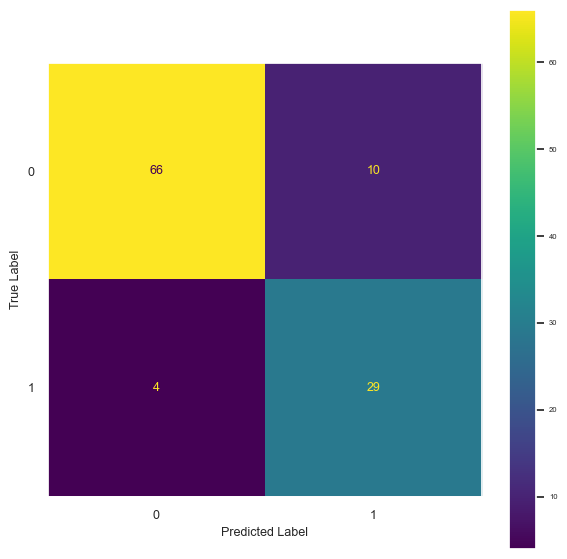

In [53]:
# Plot the confusion matrix (SMOTE)

disp = ConfusionMatrixDisplay(cfm_3, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

In [54]:
# Let's print a classification report in order to take a closer look at how the model is performing after the upsampling

print(classification_report(y_test, y_test_pred_SMOTE))

# Accuracy of our model is 87% (even if the value is very good, it decreased from the two previous models).

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        76
           1       0.74      0.88      0.81        33

    accuracy                           0.87       109
   macro avg       0.84      0.87      0.85       109
weighted avg       0.88      0.87      0.87       109



In [55]:
# Let's calculate the Kappa score (we could have a very good accuracy but, if the kappa score is not good, we cannot say that the performance of our model is
# good)

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_SMOTE).round(2))

# This kappa score is still very good but we can see that this model is not the best when working with k_neighbors = 5. Let's change this!

Kappa score: 0.71


# Logistic Regression - SMOTE (k_neighbors = 3)

In [56]:
# SMOTE with k_neighbors = 3

sm2 = SMOTE(random_state=100, k_neighbors = 3) 

X_train_SMOTE_2,y_train_SMOTE_2 = sm2.fit_resample(X_train_scaled_df,y_train)

In [57]:
# Print shapes

print(X_train.shape)
print(X_train_SMOTE_2.shape)

(432, 34)
(576, 34)


In [58]:
# Apply Logistic Regression model

classification_4 = LogisticRegression()
classification_4.fit(X_train_SMOTE_2, y_train_SMOTE_2)
y_test_pred_SMOTE_2 = classification_4.predict(X_test_scaled_df)

In [59]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "classification_4.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(classification_4, file)

In [60]:
# Create confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cfm_4 = confusion_matrix(y_test, y_test_pred_SMOTE_2)
cfm_4

array([[69,  7],
       [ 4, 29]])

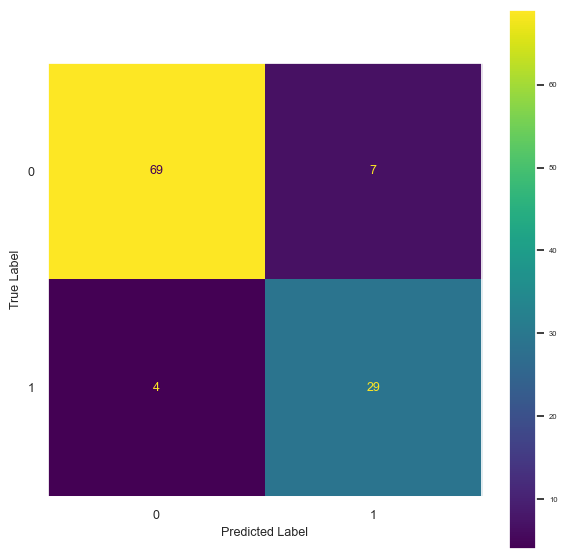

In [61]:
# Plot confusion matrix

disp = ConfusionMatrixDisplay(cfm_4, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

In [62]:
# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_SMOTE_2))

print("Kappa socre:", cohen_kappa_score(y_test, y_test_pred_SMOTE_2).round(2))

# Our SMOTE model improved with k_neighbors = 3! The accuracy is very good and the kappa score is excellent!
# Nevertheless, the best performance was given by the Logistic Regression model that didn't have any kind of upsampling tehcnique.

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.81      0.88      0.84        33

    accuracy                           0.90       109
   macro avg       0.88      0.89      0.88       109
weighted avg       0.90      0.90      0.90       109

Kappa socre: 0.77


# Random Forest model

In [63]:
# Import Random Forest library

from sklearn.ensemble import RandomForestClassifier

In [64]:
# Apply model to our original dataset (without upsampling) and create a confusion matrix

rf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 69) 

# We tried some different combinations of the previous parameters but they were increasing our false negative and false positive metrics (and we'd like to
# avoid that)

rf.fit(X_train_scaled_df, y_train)

y_test_pred_rf = rf.predict(X_test_scaled_df)
cfm_rf = confusion_matrix(y_test, y_test_pred_rf)
cfm_rf

array([[71,  5],
       [ 8, 25]])

In [65]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "rf.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(rf, file)

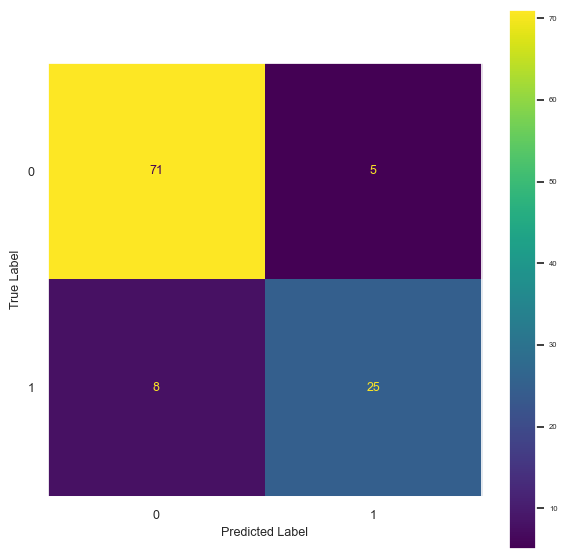

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        76
           1       0.83      0.76      0.79        33

    accuracy                           0.88       109
   macro avg       0.87      0.85      0.85       109
weighted avg       0.88      0.88      0.88       109

Kappa score: 0.71


In [67]:
# Plot the confusion matrix

disp = ConfusionMatrixDisplay(cfm_rf, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_rf))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_rf).round(2)) # Very good accuracy and kappa score but still not the best among the other tests

# Random Forest - Upsampling

In [68]:
# Apply model to our upsampled dataset, create a confusion matrix and classification report

rf_up = RandomForestClassifier(max_depth=4,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 69) 

# We tried some different combinations of the previous parameters and this one (max_depth = 4) has the best performance of all of our models.

rf_up.fit(X_train_up, y_train_up)

y_test_pred_rf_up = rf_up.predict(X_test_scaled_df)
cfm_rf_up = confusion_matrix(y_test, y_test_pred_rf_up)
cfm_rf_up

array([[71,  5],
       [ 4, 29]])

In [69]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "rf_up.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(rf_up, file)

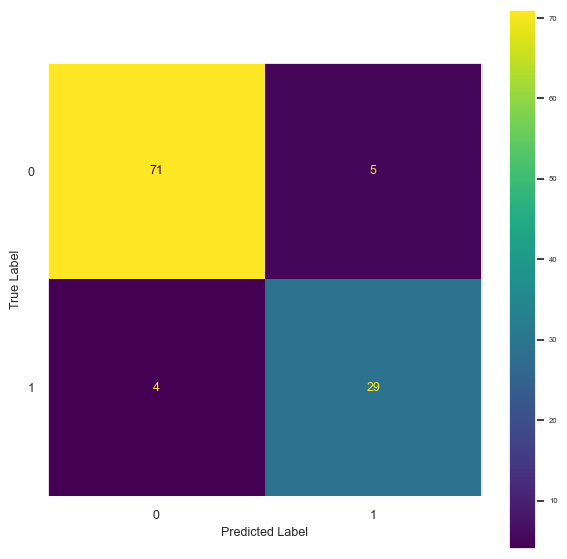

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.85      0.88      0.87        33

    accuracy                           0.92       109
   macro avg       0.90      0.91      0.90       109
weighted avg       0.92      0.92      0.92       109

Kappa score: 0.81


In [70]:
# Plot the confusion matrix

disp = ConfusionMatrixDisplay(cfm_rf_up, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_rf_up))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_rf_up).round(2)) # This model has an excellent accuracy (92%) and kappa score (0.81)! At the moment, it's the best model! 

# Random Forest - SMOTE (dataset of k_neighbors = 5)

In [71]:
# Apply model to our upsampled dataset (with SMOTE), create a confusion matrix and classification report

rf_up_SMOTE = RandomForestClassifier(max_depth=4,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 69) 

# We tried some different combinations of the previous parameters but they retrieve the same performance!

rf_up_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

y_test_pred_rf_SMOTE = rf_up_SMOTE.predict(X_test_scaled_df)
cfm_rf_SMOTE = confusion_matrix(y_test, y_test_pred_rf_SMOTE)
cfm_rf_SMOTE

array([[69,  7],
       [ 4, 29]])

In [72]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "rf_up_SMOTE.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(rf_up_SMOTE, file)

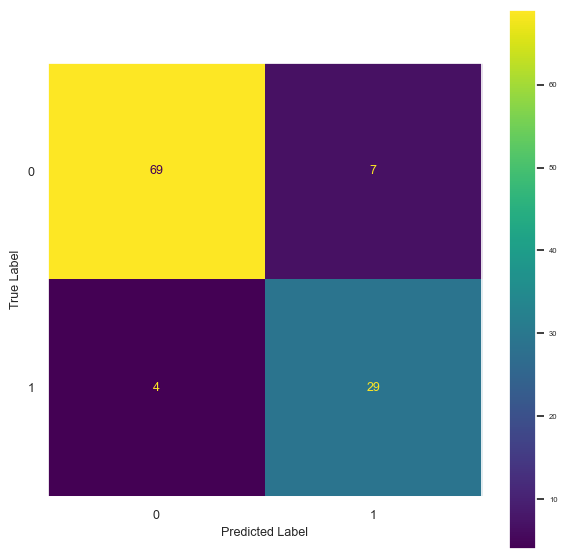

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.81      0.88      0.84        33

    accuracy                           0.90       109
   macro avg       0.88      0.89      0.88       109
weighted avg       0.90      0.90      0.90       109

Kappa score: 0.77


In [73]:
# Plot the confusion matrix

disp = ConfusionMatrixDisplay(cfm_rf_SMOTE, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_rf_SMOTE))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_rf_SMOTE).round(2)) # Not the best performance

# Random Forest - SMOTE (dataset of k_neighbors = 3)

In [74]:
# Apply model to our upsampled dataset (with SMOTE), create a confusion matrix and classification report

rf_up_SMOTE_2 = RandomForestClassifier(max_depth=4,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 69) 

# We tried some different combinations of the previous parameters but they retrieve the same performance!

rf_up_SMOTE_2.fit(X_train_SMOTE_2, y_train_SMOTE_2)

y_test_pred_rf_SMOTE_2 = rf_up_SMOTE_2.predict(X_test_scaled_df)
cfm_rf_SMOTE_2 = confusion_matrix(y_test, y_test_pred_rf_SMOTE_2)
cfm_rf_SMOTE_2

array([[69,  7],
       [ 4, 29]])

In [75]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "rf_up_SMOTE_2.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(rf_up_SMOTE_2, file)

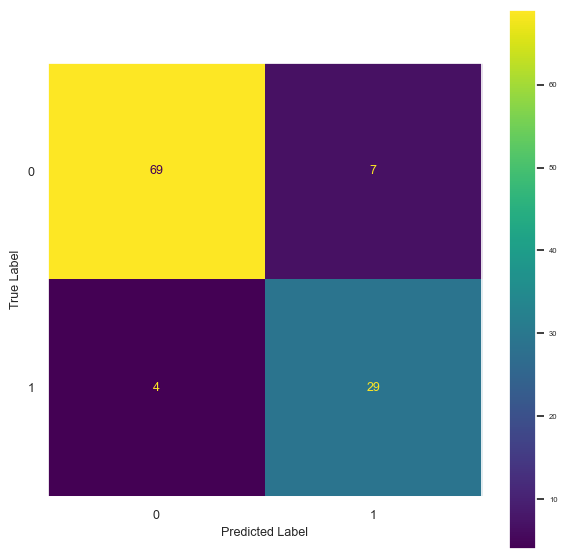

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.81      0.88      0.84        33

    accuracy                           0.90       109
   macro avg       0.88      0.89      0.88       109
weighted avg       0.90      0.90      0.90       109

Kappa score: 0.77


In [76]:
# Plot the confusion matrix

disp = ConfusionMatrixDisplay(cfm_rf_SMOTE_2, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_rf_SMOTE_2))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_rf_SMOTE_2).round(2)) # Same performance as the previous one. Very good but not the best.

# Gradient Boosting model

In [77]:
# Let's tackle our last model
# But first, let's import the library

from sklearn.ensemble import GradientBoostingClassifier


In [78]:
# Let's apply our model on the original dataset (with no upsampling), train it and predict! Also, create a confusion matrix to check results.

gb = GradientBoostingClassifier(n_estimators = 100,
                                learning_rate = 0.1,
                                max_depth = 4)

# Even if some parameters are set with their default values, we specified them there because we changed them and performed different tests to enhance performance.

gb.fit(X_train_scaled_df, y_train) 

y_test_pred_gb = gb.predict(X_test_scaled_df)

cfm_gb = confusion_matrix(y_test, y_test_pred_gb)
cfm_gb

array([[72,  4],
       [ 5, 28]])

In [79]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "gb.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(gb, file)

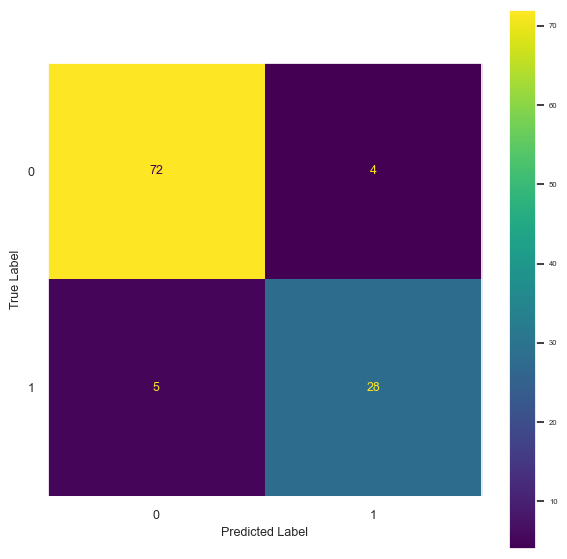

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        76
           1       0.88      0.85      0.86        33

    accuracy                           0.92       109
   macro avg       0.91      0.90      0.90       109
weighted avg       0.92      0.92      0.92       109

Kappa score: 0.8


In [80]:
# Plot the confusion matrix

disp = ConfusionMatrixDisplay(cfm_gb, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_gb))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_gb).round(2))

# At the moment, the Gradient Boosting without upsampling scores the best results alongside the Random Forest with upsampling techniques.
# Let's check if we could improve this by applying the Gradient Boosting model on our upsampled data.

# Gradient boosting - Upsampling

In [81]:
# Let's apply Gradient Boosting to our upsampled data

gb_up = GradientBoostingClassifier(n_estimators = 100,
                                learning_rate = 0.1,
                                max_depth = 4)

# Even if some parameters are set with their default values, we specified them there because we changed them and performed different tests to enhance performance.
# We tried many combinations but the performance was the same with all of them.

gb_up.fit(X_train_up, y_train_up) 

y_test_pred_gb_up = gb_up.predict(X_test_scaled_df)

cfm_gb_up = confusion_matrix(y_test, y_test_pred_gb_up)
cfm_gb_up

array([[71,  5],
       [ 4, 29]])

In [82]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "gb_up.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(gb_up, file)

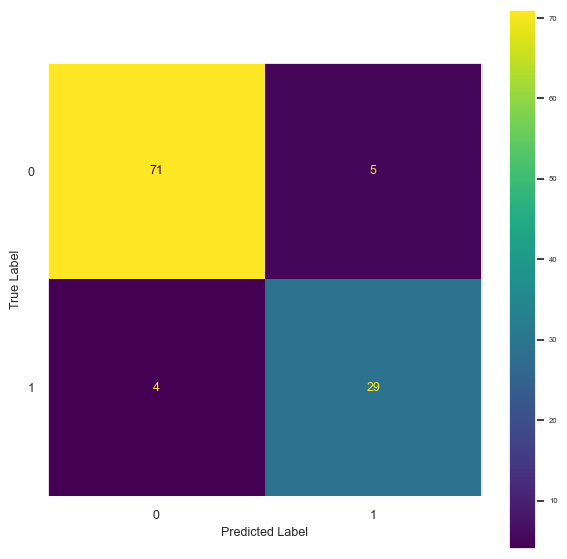

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.85      0.88      0.87        33

    accuracy                           0.92       109
   macro avg       0.90      0.91      0.90       109
weighted avg       0.92      0.92      0.92       109

Kappa score: 0.81


In [83]:
# Plot the confusion matrix

disp = ConfusionMatrixDisplay(cfm_gb_up, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_gb_up))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_gb_up).round(2)) # Very good performance but still not the best

# Gradient Boosting - SMOTE (dataset of k_neighbors = 5)

In [84]:
# Let's apply Gradient Boosting to our upsampled data

gb_SMOTE = GradientBoostingClassifier(n_estimators = 100,
                                learning_rate = 0.1,
                                max_depth = 4)

# Even if some parameters are set with their default values, we specified them there because we changed them and performed different tests to enhance performance.
# We tried many combinations but the performance was the same with all of them.

gb_SMOTE.fit(X_train_SMOTE, y_train_SMOTE) 

y_test_pred_gb_SMOTE = gb_SMOTE.predict(X_test_scaled_df)

cfm_gb_SMOTE = confusion_matrix(y_test, y_test_pred_gb_SMOTE)
cfm_gb_SMOTE


array([[71,  5],
       [ 5, 28]])

In [85]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "gb_SMOTE.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(gb_SMOTE, file)

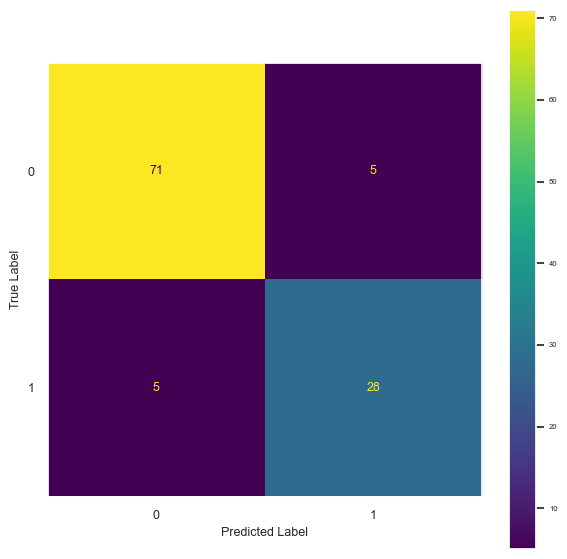

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        76
           1       0.85      0.85      0.85        33

    accuracy                           0.91       109
   macro avg       0.89      0.89      0.89       109
weighted avg       0.91      0.91      0.91       109

Kappa score: 0.78


In [86]:
# Confusion matrix and kappa score

disp = ConfusionMatrixDisplay(cfm_gb_SMOTE, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_gb_SMOTE))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_gb_SMOTE).round(2)) # Very good performance but not the best

# Gradient boosting - SMOTE (dataset of k_neighbors = 3)

In [87]:
gb_SMOTE_2 = GradientBoostingClassifier(n_estimators = 100,
                                learning_rate = 0.1,
                                max_depth = 5)

# Even if some parameters are set with their default values, we specified them there because we changed them and performed different tests to enhance performance.
# We tried many combinations but the performance was the same with all of them.

gb_SMOTE_2.fit(X_train_SMOTE_2, y_train_SMOTE_2) 

y_test_pred_gb_SMOTE_2 = gb_SMOTE_2.predict(X_test_scaled_df)
cfm_gb_SMOTE_2 = confusion_matrix(y_test, y_test_pred_gb_SMOTE_2)
cfm_gb_SMOTE_2

array([[70,  6],
       [ 4, 29]])

In [88]:
# Save the model

path = "models/"
os.makedirs(path, exist_ok = True)
filename = "gb_SMOTE_2.pkl"
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(gb_SMOTE_2, file)

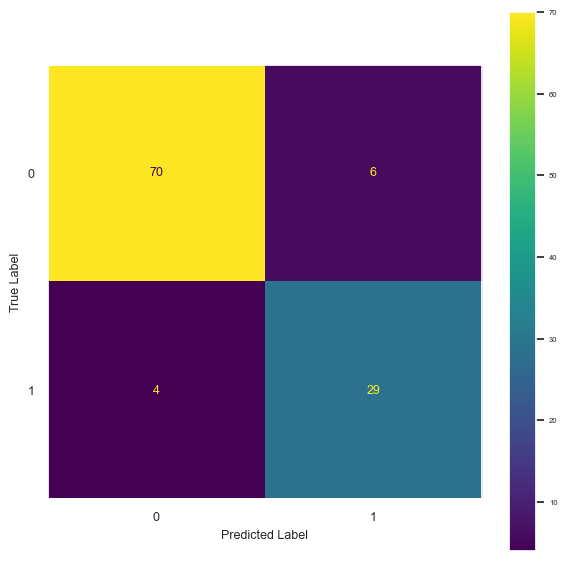

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        76
           1       0.83      0.88      0.85        33

    accuracy                           0.91       109
   macro avg       0.89      0.90      0.89       109
weighted avg       0.91      0.91      0.91       109

Kappa score: 0.79


In [89]:
# Confusion matrix and kappa score

disp = ConfusionMatrixDisplay(cfm_gb_SMOTE_2, display_labels = classification.classes_)

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 9})
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Predicted Label', fontsize=9)
ax.set_ylabel('True Label', fontsize=9) 
plt.grid(False)
plt.show()

# Print classification report and kappa score

print(classification_report(y_test, y_test_pred_gb_SMOTE_2))

print("Kappa score:", cohen_kappa_score(y_test, y_test_pred_gb_SMOTE_2).round(2))

In [101]:
# As a final step, let's review the feature importance

feature_importances = rf_up.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
column_names = X_train_up.columns

feature_importance_df = pd.DataFrame({
    'Feature': [column_names[index] for index in sorted_indices],
    'Importance': [round(feature_importances[index], 2) for index in sorted_indices]
})

# Print the DataFrame
display(feature_importance_df.head(10))  # Display top 10 features

,Feature,Importance
0,n_of_follicles_right,0.26
1,n_of_follicles_left,0.18
2,has_skin_darkening,0.09
3,has_hair_growth,0.09
4,cycle_type,0.07
5,has_weight_gain,0.06
6,eats_fast_food,0.05
7,amh,0.04
8,has_pimples,0.03
9,menstrual_phase_days,0.02


In [102]:
# Let's save our feature_importance dataframe

feature_importance_df.to_csv('feature_importance_df.csv',index = False, sep=";")

# Conclusions

We tested different models in order to understand which one was gonna help us to predict if a woman would have PCOS or not in a better way. Among those models,
we tried Logistic Regression, Random Forest and Gradient Boosting. As our dataframe was not very big, we decided to test the models with two different approaches:
first, we wanted to use our cleaned dataset of 541 rows but we also thought that it was important to test some upsampling techniques in order to understand if
the models' performance was enhanced. Because of the size of the dataset, we decided to work with Upsampling and SMOTE techniques (by using Downsampling, for
instance, we'd have reduced a lot our data).
While we were working on our models, we could see the following things:

1. Overall performance of the models was VERY good with a minimum value of precision of 87% (Logistic Regression - SMOTE with k_neighbors = 5) and a maximum
of 92% (Random Forest - Upsampling and Gradient Boosting).

2. The best model performance was seen on the Random Forest with upsampling with 92% of precision and a Kappa score of 0.81 and on Gradient Boosting (with upsampling).

3. A Logistic Regression model performed as its best without any upsampling technique (Precision: 91% and Kappa score: 0.78).

4. By looking at the dataset and metrics, we can say that the best model can predict 92% of the positive PCOS cases which equals to 163 women with PCOS (in
comparison with the 177 present in our dataset).

The more complex models we were using, the more we saw that our performance was not dramatically enhanced. We could try other techniques in order to get a 
better performance but we conclude that the results we got are really good for what we want to predict. Also, it always comes the question of how much the
performance of the models can be increased considering the limited dataset that we have? Have we reached the limit on it? This could be analyzed with a closure 
look but we would need more time to do it in a proper manner. From now on, let's enjoy our excellent precision and kappa scores :)